## PROBLEM STATEMENT

AA Pvt Ltd., has retail stores across the globe. They are struggling to generate revenue through their high end product sale. The company  has hired you as a data scientist to help them to design personalised offers for their customers based on their  purchase behaviour.

AA Pvt Ltd has collected demographic details of their customers like age, gender , marital status and city along with the total purchase amount in a month , to understand the purchase behaviour of high volume products.  

Agenda of the Industry Session : Impact of Feature Engineering on Model Performance

In [160]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style

import warnings
warnings.filterwarnings("ignore")

import os

## Importing Data

In [161]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("BlackFriday.csv")

## Exploratory Data Analysis

In [162]:
## Total # of rows and columns/features
df.shape

(537577, 12)

In [163]:
# Check top few records to get a feel of the data structure
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [76]:
## product_category_2 and product_category_3 have null values
## Although count of null values is high, but before we decide to drop we should study these features considering we are looking 
## at a grocery store data and hence product category is an important feature.

## Checking for Duplicates

In [165]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [78]:
## There are no duplicates 

In [166]:
df.rename(columns = {
                     'User_ID':'customer_id',
                     'Product_ID':'product_id',
                      'Gender': 'sex',  
                     'Age':'age_group',
                     'Purchase':'Total_Purchase_Amount',
                    'Occupation':'job_code',
                    'Marital_Status':'married',
                    'Product_Category_1': 'product_category_1',    
                    'Product_Category_2': 'product_category_2',
                    'Product_Category_3': 'product_category_3'    
                    }, 
          inplace = True)

In [167]:
df.columns

Index(['customer_id', 'product_id', 'sex', 'age_group', 'job_code',
       'City_Category', 'Stay_In_Current_City_Years', 'married',
       'product_category_1', 'product_category_2', 'product_category_3',
       'Total_Purchase_Amount'],
      dtype='object')

## Checking for unique Customers and Products

In [168]:
#Checking for unique values
print('The number of unique Customers are:',df["customer_id"].nunique())
print('The number of unique Products are:',df["product_id"].nunique())

The number of unique Customers are: 5891
The number of unique Products are: 3623


## Unique values of each categorical/object Feature

In [169]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PRODUCT_ID :  3623
P00091742       1
P00064542       1
P00315142       1
P00298342       1
P00341542       1
             ... 
P00057642    1430
P00112142    1539
P00025442    1586
P00110742    1591
P00265242    1858
Name: product_id, Length: 3623, dtype: int64


SEX :  2
F    132197
M    405380
Name: sex, dtype: int64


AGE_GROUP :  7
0-17      14707
55+       20903
51-55     37618
46-50     44526
18-25     97634
36-45    107499
26-35    214690
Name: age_group, dtype: int64


CITY_CATEGORY :  3
A    144638
C    166446
B    226493
Name: City_Category, dtype: int64


STAY_IN_CURRENT_CITY_YEARS :  5
0      72725
4+     82889
3      93312
2      99459
1     189192
Name: Stay_In_Current_City_Years, dtype: int64




In [170]:
## 2 Cities, 7 Age Groups, 5 levels for living duration in a city

## Distribution of Age Group according to Gender

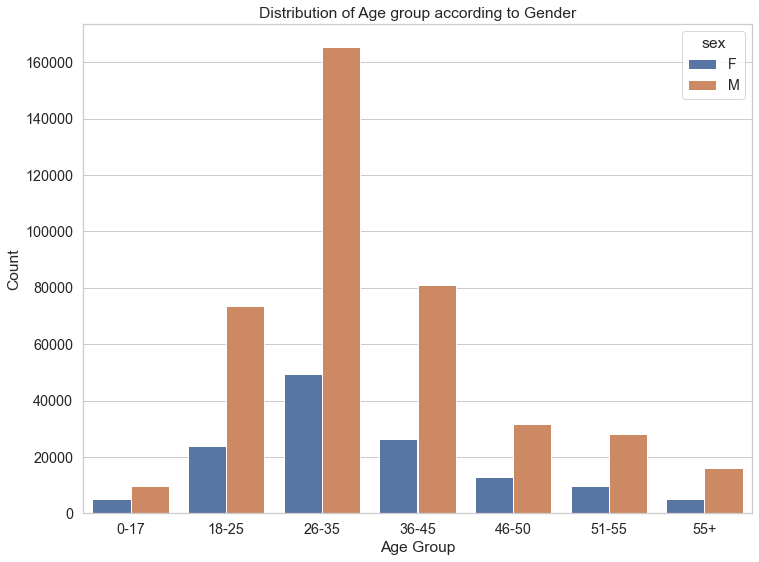

In [171]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.3)

ax = sns.countplot('age_group', 
                   hue = 'sex',
                   data = df, 
                   order = ['0-17', 
                            '18-25', 
                            '26-35', 
                            '36-45', 
                            '46-50', 
                            '51-55', '55+']);

ax.set(title = "Distribution of Age group according to Gender", xlabel = "Age Group", ylabel = "Count");

In [85]:
## Count of Male is higher across all age groups
## Most of the data points are pertiaining to Age Group 26-35

## Is Average Purchase amount is also higher for Males ??

In [86]:
malesPurchaserData = df.loc[df['sex'] == 'M']
malesPurchaseMean = np.mean(malesPurchaserData['Total_Purchase_Amount'])
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = df.loc[df['sex'] == 'F']
femalsPurchaseMean = np.mean(femalsPurchaserData['Total_Purchase_Amount'])
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  9504.771712960679
Purchase mean for femal purchasers =  8809.761348593387


In [87]:
## Yes Average Purchase amount is higher for male

## Does Average purchase amount is different across different age groups


In [172]:
# Does mean purchage amount is different across different age groups
df[['age_group', 'Total_Purchase_Amount']].groupby('age_group').mean()

,Total_Purchase_Amount
age_group,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


## Does Average purchage amount is different across job code

In [173]:
# Does mean purchage amount is different across job code
df[['job_code', 'Total_Purchase_Amount']].groupby('job_code').mean()

,Total_Purchase_Amount
job_code,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


## Does Average purchage amount is different for married customers

In [174]:
df[['married', 'Total_Purchase_Amount']].groupby('married').mean()

,Total_Purchase_Amount
married,
0,9333.325467
1,9334.632681


## Product preference based on Gender - For Product Category 1

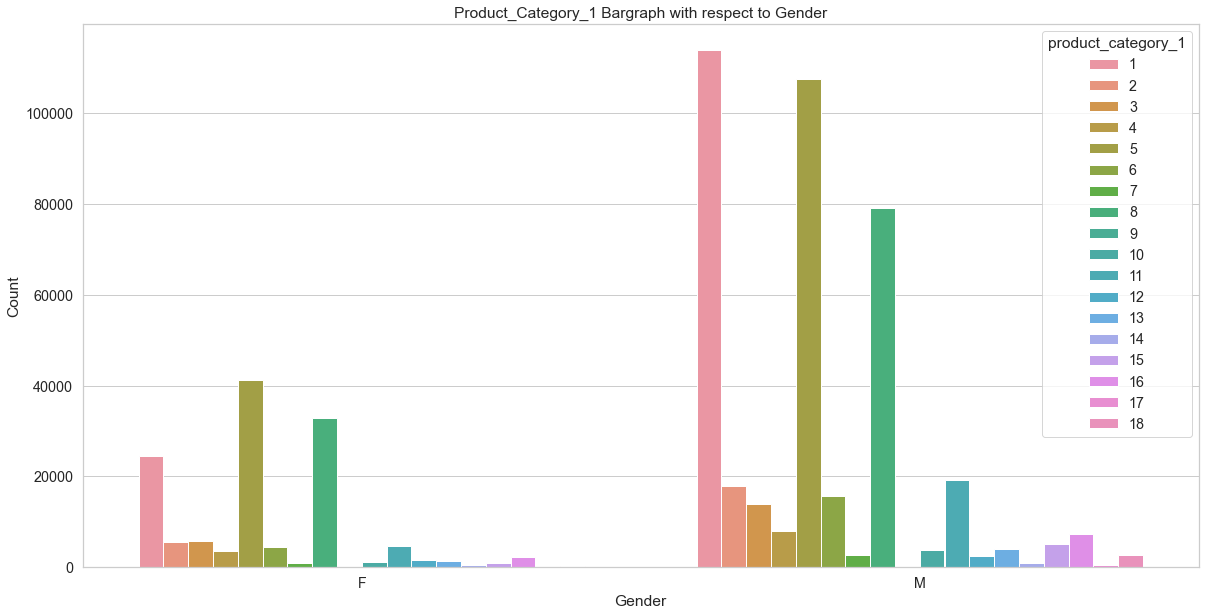

In [175]:
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.countplot('sex', 
                   hue = 'product_category_1',
                   data = df);
ax.set(title = "Product_Category_1 Bargraph with respect to Gender", xlabel = "Gender", ylabel = "Count");

In [176]:
## High transaction count is observed for product_cateogory_1 =  1, 5 and 8 across all genders
## For Female, count is highest Product Category 5 whereas for Male count is highest for product_cateogory_1 = 1

## Distribution of All Product Categories

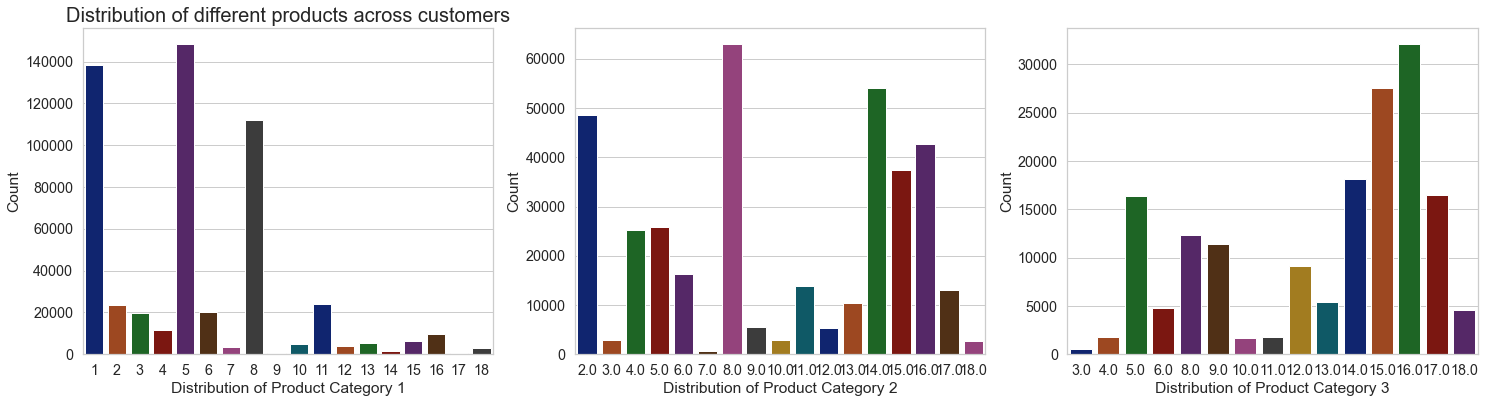

In [177]:
plt.rcParams['figure.figsize'] = (25, 6)

plt.subplot(131)
sns.countplot(df['product_category_1'], palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(df['product_category_2'], palette = 'dark')

plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(df['product_category_3'], palette = 'dark')
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

## Pre-Processing

In [94]:
## Handling missing values

In [95]:
# Most Used product according to the age group in the given data
prod_2 = df.groupby('age_group')['product_category_2'].agg(lambda x:x.value_counts().index[0])
prod_2 = dict(prod_2)
print (prod_2)

prod_3 = df.groupby('age_group')['product_category_3'].agg(lambda x:x.value_counts().index[0])
prod_3 = dict(prod_3)
print (prod_3)

{'0-17': 4.0, '18-25': 8.0, '26-35': 8.0, '36-45': 8.0, '46-50': 8.0, '51-55': 8.0, '55+': 8.0}
{'0-17': 16.0, '18-25': 16.0, '26-35': 16.0, '36-45': 16.0, '46-50': 16.0, '51-55': 16.0, '55+': 16.0}


---  Filling the null values of the product category 2, could be done based on the values identified above, for this session, fillna is used 
for i in range(len(df)):
    if np.isnan(df.iloc[i, 9]) == True:
        key = df.iloc[i, 3]
        df.iloc[i, 9] = prod_2[key]

In [178]:
# Since the most used product in product category 3 for all age group is 16.0 , using fillna for imputation
df.product_category_3.fillna(value = 16.0, inplace = True)

# Since the most used product in product category 2 for all age group is 8.0 , except for one, using fillna for this feature as well
df.product_category_2.fillna (value = 8.0, inplace = True)
        
df['product_category_2'] = df['product_category_2'].astype(int)
df['product_category_3'] = df['product_category_3'].astype(int)

print ("Null values present : ")
df.isna().sum(axis = 0)

Null values present : 


customer_id                   0
product_id                    0
sex                           0
age_group                     0
job_code                      0
City_Category                 0
Stay_In_Current_City_Years    0
married                       0
product_category_1            0
product_category_2            0
product_category_3            0
Total_Purchase_Amount         0
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   customer_id                 537577 non-null  int64 
 1   product_id                  537577 non-null  object
 2   sex                         537577 non-null  object
 3   age_group                   537577 non-null  object
 4   job_code                    537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   married                     537577 non-null  int64 
 8   product_category_1          537577 non-null  int64 
 9   product_category_2          537577 non-null  int64 
 10  product_category_3          537577 non-null  int64 
 11  Total_Purchase_Amount       537577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


## Feature Engineering 

## Step 1 - Encoding of Features

In [180]:
df["age_group"].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: age_group, dtype: int64

In [181]:
## Ordinal Encoding for age_group feature
age_dict = {'0-17':0, 
            '18-25':1, 
            '26-35':2, 
            '36-45':3, 
            '46-50':4, 
            '51-55':5,
            '55+': 6}

df["age_group"] =df["age_group"].apply(lambda x: age_dict[x])

In [182]:
df["age_group"].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: age_group, dtype: int64

In [183]:
#Turn sex binary
sex_dict = {"F":0, 
            "M":1}
df["sex"] = df["sex"].apply(lambda line: sex_dict[line])
df["sex"].value_counts()

1    405380
0    132197
Name: sex, dtype: int64

In [184]:
df.head()

,customer_id,product_id,sex,age_group,job_code,City_Category,Stay_In_Current_City_Years,married,product_category_1,product_category_2,product_category_3,Total_Purchase_Amount
0,1000001,P00069042,0,0,10,A,2,0,3,8,16,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,A,2,0,12,8,16,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14,16,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,8,16,7969


In [185]:
df["City_Category"].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [186]:
## Encoding based on total count of values under each label category
city_dict = {"A":0, "B":1, "C":2}
df["City_Category"] = df["City_Category"].apply(lambda line: city_dict[line])

In [187]:
df["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

In [188]:
## using label encoder for 'living_in_current_city_since' and 'sex'
## converting customer_id and product_id as string so that they are not considered as numeric just because these features have values as numbers

In [189]:
from sklearn.preprocessing import LabelEncoder

df['customer_id']= df['customer_id'].astype(str)
df['product_id']= df['product_id'].astype(str)

columns_list = ["customer_id", "product_id",'Stay_In_Current_City_Years']

for var in columns_list:
    LE = LabelEncoder()
    df[var] = LE.fit_transform( df[var])

df['customer_id']= df['customer_id'].astype(str)
df['product_id']= df['product_id'].astype(str)

In [190]:
df.head()

,customer_id,product_id,sex,age_group,job_code,City_Category,Stay_In_Current_City_Years,married,product_category_1,product_category_2,product_category_3,Total_Purchase_Amount
0,0,670,0,0,10,0,2,0,3,8,16,8370
1,0,2374,0,0,10,0,2,0,1,6,14,15200
2,0,850,0,0,10,0,2,0,12,8,16,1422
3,0,826,0,0,10,0,2,0,12,14,16,1057
4,1,2732,1,6,16,2,4,0,8,8,16,7969


In [111]:
# #Dummy Variables:
# df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'], drop_first=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   customer_id                 537577 non-null  object
 1   product_id                  537577 non-null  object
 2   sex                         537577 non-null  int64 
 3   age_group                   537577 non-null  int64 
 4   job_code                    537577 non-null  int64 
 5   City_Category               537577 non-null  int64 
 6   Stay_In_Current_City_Years  537577 non-null  int64 
 7   married                     537577 non-null  int64 
 8   product_category_1          537577 non-null  int64 
 9   product_category_2          537577 non-null  int64 
 10  product_category_3          537577 non-null  int64 
 11  Total_Purchase_Amount       537577 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 49.2+ MB


In [192]:
## Train Test Split

In [193]:
# Copy all the predictor variables into X dataframe
X = df.drop('Total_Purchase_Amount', axis=1)

# Copy target into the y dataframe. 
y = df[['Total_Purchase_Amount']]

In [194]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=1)

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
Decision_model = DecisionTreeRegressor()
Decision_model.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model.predict(X_test)


In [197]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 3787.524073906923
R2 Score: 0.4198844162490114


In [198]:
importance = Decision_model.feature_importances_
importance

array([0.11924728, 0.0823332 , 0.00935129, 0.02927893, 0.05008244,
       0.01532666, 0.03067094, 0.01168493, 0.62767848, 0.01285017,
       0.01149567])

<AxesSubplot:>

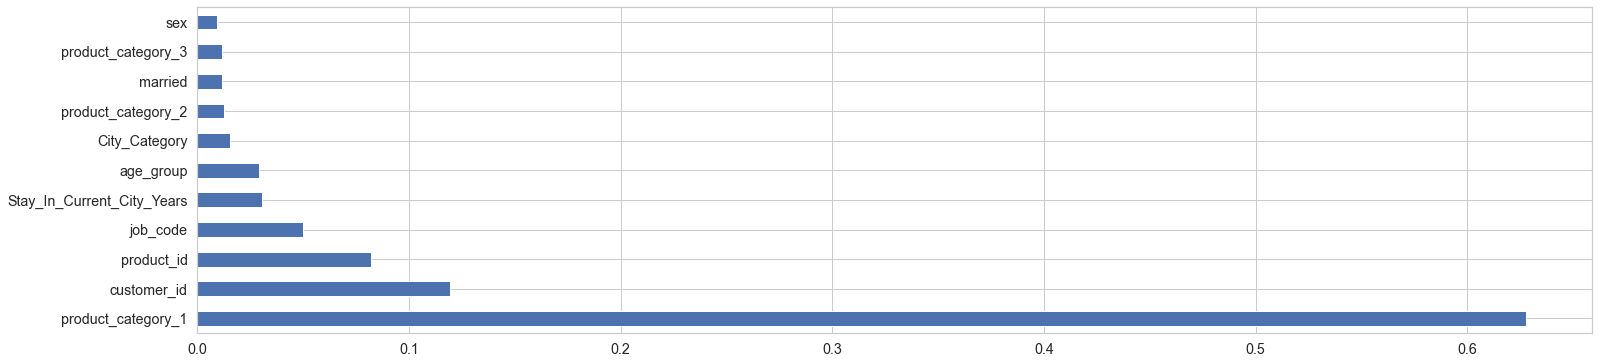

In [199]:
(pd.Series(importance, index=X.columns)
   .nlargest(15)
   .plot(kind='barh'))  

In [200]:
## Product Category 1 is the most significant feature.. New features should be generated for this feature to understand the impact on model performance

In [122]:
## Before generation of new features.. Let's build another model using advanced algorithms like gradient boosting.. To see 
## how boosting has helped to improve the performance 

In [201]:
from sklearn.ensemble import GradientBoostingRegressor

from math import *

model = GradientBoostingRegressor(n_estimators = 100, 
                                  max_depth = 5, 
                                  min_samples_split = 2,
                                  learning_rate = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [202]:
# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2807.482944270394
R2 Score: 0.6812589628934171


In [125]:
## This model is better than the Decision Tree Regressor..

## We should try to use some other algorithms like linear regression including regularisation technique to compare the model performance
## before generation of any new feature

## Step 2 - New Features

In [126]:
## We could apply the Feature enginnering on the original data set and then split it into train and test
## However for the session to ensure that performance is being measured on the same set of rows , feature engiinering is applied in the train 
## and then the same object is used to do a fit on the test split data frame

In [203]:
## Full Test and Train
full_train_data = X_train.copy()
full_train_data['Total_Purchase_Amount'] = y_train

full_test_data = X_test.copy()
full_test_data['Total_Purchase_Amount'] = y_test

In [128]:
## As we have multiple records for a customer id.. let's calculate the mean value for each customer and include that as a feature
## Similarly mean value of the total purchase amount based on each product id

In [204]:
X_train["customer_id_MeanPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('mean')

In [205]:
X_train.head()

,customer_id,product_id,sex,age_group,job_code,City_Category,Stay_In_Current_City_Years,married,product_category_1,product_category_2,product_category_3,customer_id_MeanPrice
464186,5363,2646,1,2,2,0,4,0,8,11,16,9077.777778
327960,2434,1776,0,2,14,0,4,0,8,14,16,7224.972222
429851,169,931,1,2,0,1,1,1,8,12,16,10247.024793
468081,78,3068,0,2,0,0,1,1,6,10,16,12291.244444
146929,4528,1277,1,2,0,0,0,0,5,8,16,7814.576087


In [206]:
X_train["customer_id_MeanPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('mean')
userID_mean_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].mean().to_dict()
X_test['customer_id_MeanPrice'] = full_test_data['customer_id'].apply(lambda x:userID_mean_dict.get(x,0))

X_train["product_id_MeanPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('mean')
productID_mean_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].mean().to_dict()
X_test['product_id_MeanPrice'] = full_test_data['product_id'].apply(lambda x:productID_mean_dict.get(x,0))

In [207]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 403182 non-null  object 
 1   product_id                  403182 non-null  object 
 2   sex                         403182 non-null  int64  
 3   age_group                   403182 non-null  int64  
 4   job_code                    403182 non-null  int64  
 5   City_Category               403182 non-null  int64  
 6   Stay_In_Current_City_Years  403182 non-null  int64  
 7   married                     403182 non-null  int64  
 8   product_category_1          403182 non-null  int64  
 9   product_category_2          403182 non-null  int64  
 10  product_category_3          403182 non-null  int64  
 11  customer_id_MeanPrice       403182 non-null  float64
 12  product_id_MeanPrice        403182 non-null  float64
dtypes: float6

In [208]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 134395 non-null  object 
 1   product_id                  134395 non-null  object 
 2   sex                         134395 non-null  int64  
 3   age_group                   134395 non-null  int64  
 4   job_code                    134395 non-null  int64  
 5   City_Category               134395 non-null  int64  
 6   Stay_In_Current_City_Years  134395 non-null  int64  
 7   married                     134395 non-null  int64  
 8   product_category_1          134395 non-null  int64  
 9   product_category_2          134395 non-null  int64  
 10  product_category_3          134395 non-null  int64  
 11  customer_id_MeanPrice       134395 non-null  float64
 12  product_id_MeanPrice        134395 non-null  float64
dtypes: float64

In [209]:
Decision_model_2 = DecisionTreeRegressor()
Decision_model_2.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_2.predict(X_test)


In [210]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 3559.5323127308734
R2 Score: 0.48762302218910547


In [211]:
importance = Decision_model_2.feature_importances_
importance

array([0.04313813, 0.03538111, 0.00359948, 0.01419052, 0.02224904,
       0.00858714, 0.01391373, 0.00508123, 0.00946426, 0.01471079,
       0.00952558, 0.06911058, 0.75104841])

<AxesSubplot:>

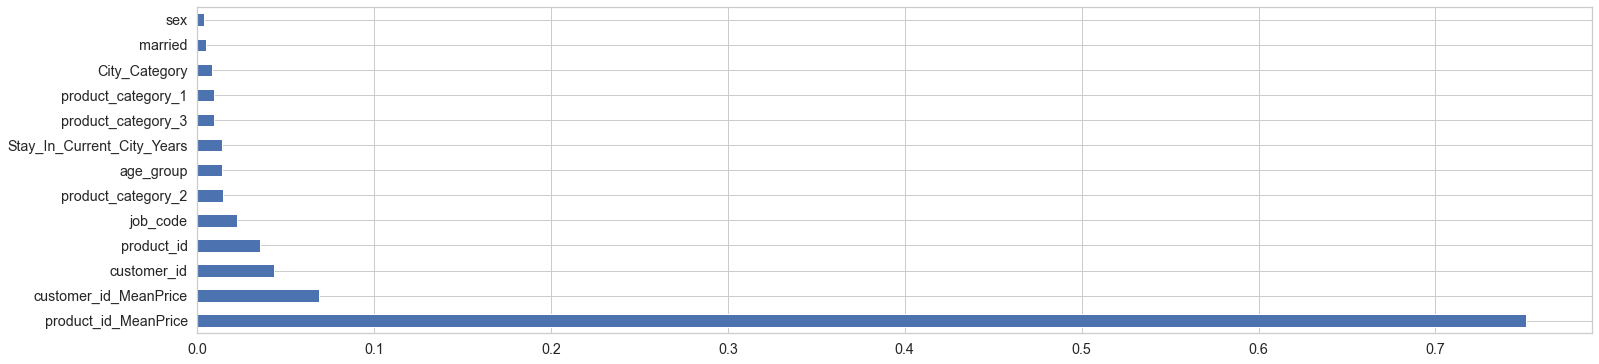

In [212]:
(pd.Series(importance, index=X_train.columns)
   .nlargest(16)
   .plot(kind='barh'))  

In [213]:
## Both the new created featues are significant..R2 and RMSE has improved in comparison to earlier model

In [214]:
## Let's create features with max and min value of the total purchase amount grouped by customer id and product id as 
## the earlier created features were significant

In [215]:
X_train["customer_id_MaxPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('max')
userID_max_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].max().to_dict()
X_test['customer_id_MaxPrice'] = full_test_data['customer_id'].apply(lambda x:userID_max_dict.get(x,0))

X_train["customer_id_MinPrice"] = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].transform('min')
userID_min_dict = full_train_data.groupby(['customer_id'])['Total_Purchase_Amount'].min().to_dict()
X_test['customer_id_MinPrice'] = full_test_data['customer_id'].apply(lambda x:userID_min_dict.get(x,0))

X_train["product_id_MaxPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('max') 
productID_max_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].max().to_dict() 
X_test['product_id_MaxPrice'] = full_test_data['product_id'].apply(lambda x:productID_max_dict.get(x,0))

X_train["product_id_MinPrice"] = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].transform('min')
productID_min_dict = full_train_data.groupby(['product_id'])['Total_Purchase_Amount'].min().to_dict()
X_test['product_id_MinPrice'] = full_test_data['product_id'].apply(lambda x:productID_min_dict.get(x,0))

In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 403182 non-null  object 
 1   product_id                  403182 non-null  object 
 2   sex                         403182 non-null  int64  
 3   age_group                   403182 non-null  int64  
 4   job_code                    403182 non-null  int64  
 5   City_Category               403182 non-null  int64  
 6   Stay_In_Current_City_Years  403182 non-null  int64  
 7   married                     403182 non-null  int64  
 8   product_category_1          403182 non-null  int64  
 9   product_category_2          403182 non-null  int64  
 10  product_category_3          403182 non-null  int64  
 11  customer_id_MeanPrice       403182 non-null  float64
 12  product_id_MeanPrice        403182 non-null  float64
 13  customer_

In [217]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 134395 non-null  object 
 1   product_id                  134395 non-null  object 
 2   sex                         134395 non-null  int64  
 3   age_group                   134395 non-null  int64  
 4   job_code                    134395 non-null  int64  
 5   City_Category               134395 non-null  int64  
 6   Stay_In_Current_City_Years  134395 non-null  int64  
 7   married                     134395 non-null  int64  
 8   product_category_1          134395 non-null  int64  
 9   product_category_2          134395 non-null  int64  
 10  product_category_3          134395 non-null  int64  
 11  customer_id_MeanPrice       134395 non-null  float64
 12  product_id_MeanPrice        134395 non-null  float64
 13  customer_i

In [218]:
Decision_model_3 = DecisionTreeRegressor()
Decision_model_3.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_3.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_3.predict(X_test)

In [219]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 3561.0384665075476
R2 Score: 0.4871893237579715


<AxesSubplot:>

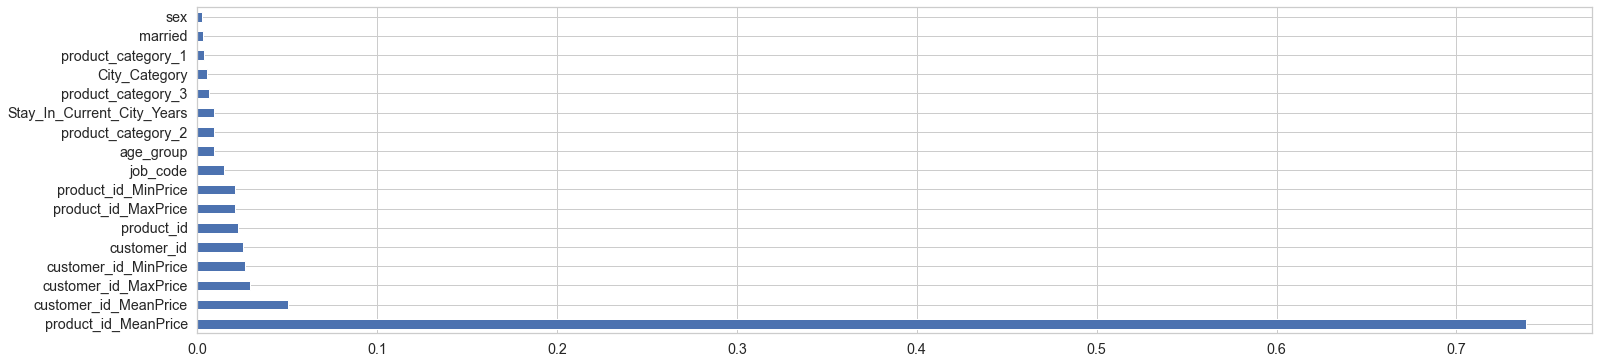

In [220]:
importance = Decision_model_3.feature_importances_
importance
(pd.Series(importance, index=X_train.columns)
   .nlargest(19)
   .plot(kind='barh'))  

In [221]:
## Marginal improvement in R2 and RMSE.. Newly created features are significant

In [222]:
## As Product Category 1 was the most significant feature in the orginal dataset, lets create new feature using max, min and mean value for Total pourchase amount
## For all categorical features, count is done for each level/category and the same is added as a new feature

In [223]:
X_train["Product_Cat1_MaxPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('max')
pc1_max_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].max().to_dict() 
X_test['Product_Cat1_MaxPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_max_dict.get(x,0))

X_train["Product_Cat1_MinPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('min') 
pc1_min_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].min().to_dict() 
X_test['Product_Cat1_MinPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_min_dict.get(x,0))

X_train["Product_Cat1_MeanPrice"] = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].transform('mean') 
pc1_mean_dict = full_train_data.groupby(['product_category_1'])['Total_Purchase_Amount'].mean().to_dict() 
X_test['Product_Cat1_MeanPrice'] = full_test_data['product_category_1'].apply(lambda x:pc1_mean_dict.get(x,0))


X_train["customer_id_Count"] = full_train_data.groupby(['customer_id'])['customer_id'].transform('count')
customerid_count_dict = full_train_data.groupby(['customer_id']).size().to_dict()
X_test[' customer_id_Count'] = full_test_data['customer_id'].apply(lambda x:customerid_count_dict.get(x,0))
 
X_train["Product_ID_Count"] = full_train_data.groupby(['product_id'])['product_id'].transform('count')
productID_count_dict = full_train_data.groupby(['product_id']).size().to_dict()
X_test['Product_ID_Count'] = full_test_data['product_id'].apply(lambda x:productID_count_dict.get(x,0))


X_train["Age_Group_Count"] = full_train_data.groupby(['age_group'])['age_group'].transform('count')
age_count_dict = full_train_data.groupby(['age_group']).size().to_dict()
X_test['Age_Group_Count'] = full_test_data['age_group'].apply(lambda x:age_count_dict.get(x,0))
 
X_train["job_code_Count"] = full_train_data.groupby(['job_code'])['job_code'].transform('count')
occupation_count_dict = full_train_data.groupby(['job_code']).size().to_dict()
X_test['job_code_Count'] = full_test_data['job_code'].apply(lambda x:occupation_count_dict.get(x,0))
 
X_train["Product_Category_2_Count"] = full_train_data.groupby(['product_category_2'])['product_category_2'].transform('count')
pc2_count_dict = full_train_data.groupby(['product_category_2']).size().to_dict()
X_test['Product_Category_2_Count'] = full_test_data['product_category_2'].apply(lambda x:pc2_count_dict.get(x,0))
 
X_train["Product_Category_3_Count"] = full_train_data.groupby(['product_category_3'])['product_category_3'].transform('count')
pc3_count_dict = full_train_data.groupby(['product_category_3']).size().to_dict()
X_test['Product_Category_3_Count'] = full_test_data['product_category_3'].apply(lambda x:pc3_count_dict.get(x,0))


X_train["Product_Category_1_Count"] = full_train_data.groupby(['product_category_1'])['product_category_1'].transform('count')
pc1_count_dict = full_train_data.groupby(['product_category_1']).size().to_dict()
X_test['Product_Category_1_Count'] = full_test_data['product_category_1'].apply(lambda x:pc1_count_dict.get(x,0))

In [224]:
X_test.head()

,customer_id,product_id,sex,age_group,job_code,City_Category,Stay_In_Current_City_Years,married,product_category_1,product_category_2,...,Product_Cat1_MaxPrice,Product_Cat1_MinPrice,Product_Cat1_MeanPrice,customer_id_Count,Product_ID_Count,Age_Group_Count,job_code_Count,Product_Category_2_Count,Product_Category_3_Count,Product_Category_1_Count
94689,2560,903,1,6,1,0,3,1,8,8,...,10082,1939,7498.118332,122,182,15691,34451,172401,303962,84221
107751,4447,1624,0,2,9,2,2,1,3,4,...,13717,2638,10092.423854,49,213,160885,4599,19022,303962,14991
254948,3272,2703,1,5,17,2,3,1,5,8,...,8907,1713,6240.393320,151,238,28165,29312,172401,3441,111230
134132,2643,825,1,2,12,2,3,0,10,13,...,23961,4624,19717.892725,48,416,160885,22732,7772,303962,3794
481870,2084,480,1,1,0,2,1,1,1,4,...,19708,3790,13615.385825,37,59,73223,51199,19022,303962,103674


In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 464186 to 128037
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   403182 non-null  object 
 1   product_id                    403182 non-null  object 
 2   sex                           403182 non-null  int64  
 3   age_group                     403182 non-null  int64  
 4   job_code                      403182 non-null  int64  
 5   City_Category                 403182 non-null  int64  
 6   married                       403182 non-null  int64  
 7   product_category_1            403182 non-null  int64  
 8   product_category_2            403182 non-null  int64  
 9   product_category_3            403182 non-null  int64  
 10  Stay_In_Current_City_Years_1  403182 non-null  uint8  
 11  Stay_In_Current_City_Years_2  403182 non-null  uint8  
 12  Stay_In_Current_City_Years_3  403182 no

In [225]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134395 entries, 94689 to 386316
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 134395 non-null  object 
 1   product_id                  134395 non-null  object 
 2   sex                         134395 non-null  int64  
 3   age_group                   134395 non-null  int64  
 4   job_code                    134395 non-null  int64  
 5   City_Category               134395 non-null  int64  
 6   Stay_In_Current_City_Years  134395 non-null  int64  
 7   married                     134395 non-null  int64  
 8   product_category_1          134395 non-null  int64  
 9   product_category_2          134395 non-null  int64  
 10  product_category_3          134395 non-null  int64  
 11  customer_id_MeanPrice       134395 non-null  float64
 12  product_id_MeanPrice        134395 non-null  float64
 13  customer_i

In [226]:
Decision_model_4 = DecisionTreeRegressor()
Decision_model_4.fit(X_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Decision_model_4.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =Decision_model_4.predict(X_test)

In [227]:
mse = mean_squared_error(y_test, pred_class_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, pred_class_test)
print("R2 Score:", r2)

RMSE Error: 3548.3734833166595
R2 Score: 0.4908305027287133


<AxesSubplot:>

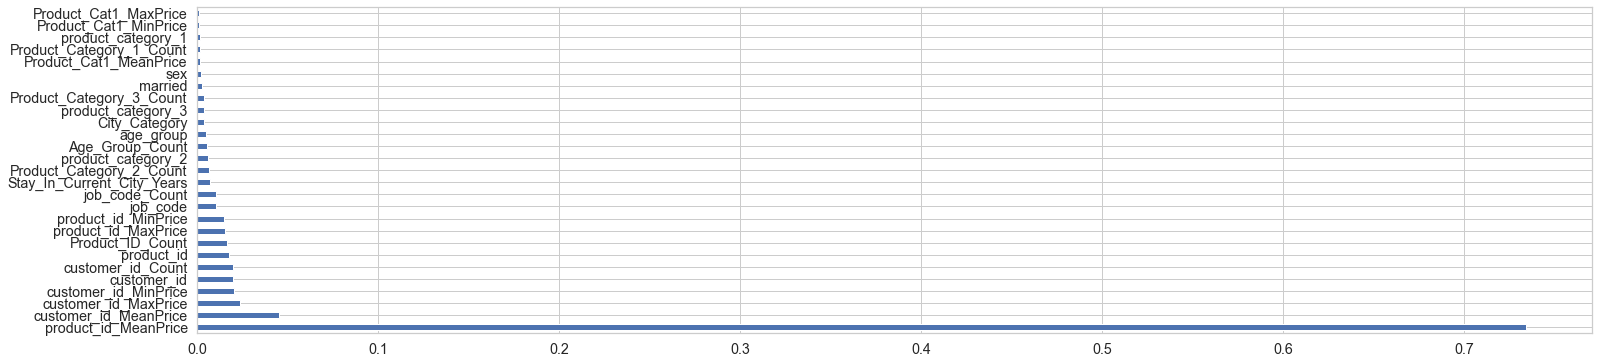

In [228]:
importance = Decision_model_4.feature_importances_
importance
(pd.Series(importance, index=X_train.columns)
   .nlargest(29)
   .plot(kind='barh'))  

In [229]:
## Further improvement in performance

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

from math import *

model = GradientBoostingRegressor(n_estimators = 100, 
                                  max_depth = 5, 
                                  min_samples_split = 2, 
                                  learning_rate = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [159]:

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2546.1206273725306
R2 Score: 0.7378428669475615


## Some more features which could be created

(i) Age 26-35 is the most significant age group in the data set.. Also average purchase amount is differnt for married customers. Can these two features be combined

(ii) Dummeies from Product category 1 as this was the most significant feature in the original data

(ii) Convert the new  mean feature created after grouping based on customer id and total purchase amount in to categorical e.g. look at the quartile value and then define 10 category of customers


In [76]:
###################################################################
#######################################################################

In [77]:
#### Another Way to Create FEatures ###################333

We can create dummy for products i.e. for each product make it 1 if the user has bought it or 0 otherwise .

We can do this for some seleted number of products like top 100 products (by number of transactions).

Also we can select top categories like 18 categories in product_category_1

So we are going to find 100 most selling products and 18 categories (by number of transactions) 
For each user, put purchase amount of this product/product category as a new feature thus  adding totally 118 new features 


In [40]:
new_df=df.copy()

In [41]:
new_df.head()

,customer_id,product_id,Gender,age_group,job_code,City_Category,Stay_In_Current_City_Years,married,Product_Category_1,Product_Category_2,Product_Category_3,Total_Purchase_Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
columns = ['product_id', 'Product_Category_1']
for column in columns:
    top_100 = df[column].value_counts().index[:100]    
    user_purchase = pd.pivot_table(
        df[['customer_id', column, 'Total_Purchase_Amount']],
        values='Total_Purchase_Amount',
        index='customer_id',
        columns=column,
        aggfunc=np.sum
    ).fillna(0)[top_100]  
    new_df = new_df.join(user_purchase)

In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Columns: 130 entries, customer_id to 9
dtypes: float64(120), int64(5), object(5)
memory usage: 533.2+ MB
